# 최근접 이웃(K-Nearest Neighbor)

* 특별한 예측 모델 없이 가장 가까운 데이터 포인트를 기반으로 예측을 수행하는 방법
* 지도 학습의 한 종류
* 분류와 회귀 모두 지원
* 범주형 변수가 포함된 데이터에서는 사용하기 힘듬
  + encoding 필요



![k nearest neighbor](https://upload.wikimedia.org/wikipedia/commons/thumb/e/e7/KnnClassification.svg/220px-KnnClassification.svg.png)

## 하이퍼 파라미터

* n_neighbors 
  * ```default = 5```
  * number of neighbors

* weight : {'uniform', 'distance'}
  * ```default = 'uniform'```
  * uniform : All points in each neighborhood are weighted equally.
  * distance : weight points by the inverse of their distance.

* algorithm : {'auto', 'ball_tree', 'kd_tree','brute'}  
  * ```default = 'auto' ```
  * ball_tree works well on high dimension 

* metric 
  * ```default = 'minkowski' ```

* p
  * ``` default = 2 ```
  * Power parameter for the Minkowski metric.
  * p = 1 menhatten
  * p = 2 euclidean
  * else minkowski


In [ ]:
import pandas as pd
import numpy as np
import multiprocessing
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])

<ipython-input-1-263f5f737d08>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['seaborn-whitegrid'])


In [ ]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.manifold import TSNE

## K 최근접 이웃 분류

* 입력 데이터 포인트와 가장 가까운 k개의 훈련 데이터 포인트가 출력
* k개의 데이터 포인트 중 가장 많은 클래스가 예측 결과

### 붓꽃 데이터

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()

In [ ]:
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.insert(loc = 0, column = 'target', value = iris.target)
iris_df

,target,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0,5.1,3.5,1.4,0.2
1,0,4.9,3.0,1.4,0.2
2,0,4.7,3.2,1.3,0.2
3,0,4.6,3.1,1.5,0.2
4,0,5.0,3.6,1.4,0.2
...,...,...,...,...,...
145,2,6.7,3.0,5.2,2.3
146,2,6.3,2.5,5.0,1.9
147,2,6.5,3.0,5.2,2.0
148,2,6.2,3.4,5.4,2.3


In [ ]:
from sklearn.model_selection import train_test_split

X, y  = load_iris(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                    random_state = 2023)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [ ]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)

print('학습 데이터 점수 : {}'.format(model.score(X_train, y_train)))
print('평가 데이터 점수 : {}'.format(model.score(X_test, y_test)))

학습 데이터 점수 : 0.95
평가 데이터 점수 : 1.0


In [ ]:
model.fit(X_train_scale, y_train)

print('학습 데이터 점수 : {}'.format(model.score(X_train_scale, y_train)))
print('평가 데이터 점수 : {}'.format(model.score(X_test_scale, y_test)))

학습 데이터 점수 : 0.95
평가 데이터 점수 : 1.0


In [ ]:
from joblib.parallel import cpu_count
from sklearn.model_selection import cross_validate
import sklearn.model_selection as ms

cross_validate(
    estimator = KNeighborsClassifier(),
    X = X, y = y,
    cv = ms.KFold(shuffle = True, random_state = 2023),
    n_jobs = multiprocessing.cpu_count(),
    verbose = True
)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    4.4s finished


{'fit_time': array([0.00470233, 0.00169897, 0.00654316, 0.00120187, 0.0010705 ]),
 'score_time': array([0.00345922, 0.00358701, 0.00831008, 0.00935173, 0.01303959]),
 'test_score': array([1.        , 0.96666667, 0.96666667, 0.96666667, 0.93333333])}

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

make_pipeline(KNeighborsClassifier()).get_params().items()

dict_items([('memory', None), ('steps', [('kneighborsclassifier', KNeighborsClassifier())]), ('verbose', False), ('kneighborsclassifier', KNeighborsClassifier()), ('kneighborsclassifier__algorithm', 'auto'), ('kneighborsclassifier__leaf_size', 30), ('kneighborsclassifier__metric', 'minkowski'), ('kneighborsclassifier__metric_params', None), ('kneighborsclassifier__n_jobs', None), ('kneighborsclassifier__n_neighbors', 5), ('kneighborsclassifier__p', 2), ('kneighborsclassifier__weights', 'uniform')])

In [ ]:
param_dict = {'kneighborsclassifier__n_neighbors' : [3,5,7],
              'kneighborsclassifier__weights' : ['uniform', 'distance'],
              'kneighborsclassifier__algorithm' : ['ball_tree', 'kd_tree', 'brute']}

model = make_pipeline(StandardScaler(), KNeighborsClassifier())

gs = GridSearchCV(model, param_grid = param_dict, 
                  n_jobs = multiprocessing.cpu_count(),
                  cv = ms.KFold(shuffle = True, random_state = 2023),
                  verbose = True)

In [ ]:
gs.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=2023, shuffle=True),
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             n_jobs=2,
             param_grid={'kneighborsclassifier__algorithm': ['ball_tree',
                                                             'kd_tree',
                                                             'brute'],
                         'kneighborsclassifier__n_neighbors': [3, 5, 7],
                         'kneighborsclassifier__weights': ['uniform',
                                                           'distance']},
             verbose=True)

In [ ]:
print('최적 파라미터 : ', gs.best_estimator_)
print('최종 점수 :', gs.score(X_test, y_test))
res = pd.DataFrame(gs.cv_results_).sort_values('rank_test_score')
res[['rank_test_score', 'mean_test_score',
     'param_kneighborsclassifier__algorithm',
     'param_kneighborsclassifier__n_neighbors',
     'param_kneighborsclassifier__weights']].head()

최적 파라미터 :  Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier',
                 KNeighborsClassifier(algorithm='ball_tree', n_neighbors=7))])
최종 점수 : 1.0


,rank_test_score,mean_test_score,param_kneighborsclassifier__algorithm,param_kneighborsclassifier__n_neighbors,param_kneighborsclassifier__weights
17,1,0.941667,brute,7,distance
4,1,0.941667,ball_tree,7,uniform
5,1,0.941667,ball_tree,7,distance
11,1,0.941667,kd_tree,7,distance
16,1,0.941667,brute,7,uniform


In [ ]:
def make_meshgrid(x, y, h = 0.2):
  x_min, x_max = x.min() - 1, x.max() + 1
  y_min, y_max = y.min() - 1, y.max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                       np.arange(y_min, y_max, h))
  return xx, yy

def plot_contours(clf, xx, yy, **params):
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  out = plt.contourf(xx, yy, Z, **params)

  return out

In [ ]:
tsne = TSNE(n_components = 2)
X_comp = tsne.fit_transform(X)

In [ ]:
iris_comp_df = pd.DataFrame(data = X_comp)
iris_comp_df.insert(0, 'target', y)
iris_comp_df

,target,0,1
0,0,-23.580931,-0.522060
1,0,-26.291704,-1.093696
2,0,-26.193335,0.053057
3,0,-26.638256,-0.321696
4,0,-23.545013,-0.941377
...,...,...,...
145,2,11.363099,-4.289077
146,2,10.691204,-1.015444
147,2,11.097084,-3.357184
148,2,13.195991,-3.724547


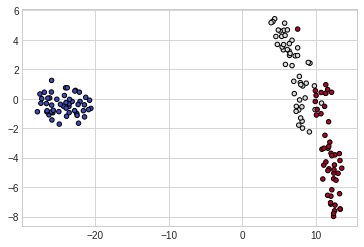

In [ ]:
plt.scatter(X_comp[:,0], X_comp[:,1], c = y,
            cmap = plt.cm.coolwarm, s = 20, edgecolors = 'k')

In [ ]:
model = KNeighborsClassifier()
model.fit(X_comp, y)
predict = model.predict(X_comp)

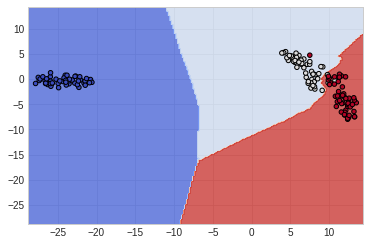

In [ ]:
xx, yy = make_meshgrid(X_comp[:,0], X_comp[:,1])
plot_contours(model, xx, yy, cmap = plt.cm.coolwarm, alpha = 0.8)
plt.scatter(X_comp[:,0], X_comp[:,1], c = y, cmap = plt.cm.coolwarm, s = 20, edgecolors = 'k')

### 유방암 데이터

In [ ]:
from sklearn.datasets import load_breast_cancer

breast_cancer = load_breast_cancer()
X, y = load_breast_cancer(return_X_y = True)

In [ ]:
breast_df = pd.DataFrame(breast_cancer.data, columns = breast_cancer.feature_names)
breast_df.insert(0, column = 'target', value = breast_cancer.target)
breast_df

,target,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,0,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,0,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,0,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                    random_state = 2023)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import sklearn.model_selection as ms

model = make_pipeline(StandardScaler(), KNeighborsClassifier())
param_dict = {'kneighborsclassifier__n_neighbors' : [3,5,7],
              'kneighborsclassifier__weights' : ['uniform', 'distance'],
              'kneighborsclassifier__algorithm' : ['ball_tree', 'kd_tree', 'brute','auto'],
              'kneighborsclassifier__p' : [1,2,3]}

gs = GridSearchCV(model, param_grid = param_dict, 
                  cv = ms.KFold(shuffle = True, random_state = 2023),
                  n_jobs = multiprocessing.cpu_count(),
                  verbose = True)

In [ ]:
gs.fit(X_train, y_train)
print('최적 파라미터 : {}'.format(gs.best_estimator_))
print('최종 점수 : {}'.format(gs.score(X_test, y_test)))

res = pd.DataFrame(gs.cv_results_).sort_values('rank_test_score')
res[['rank_test_score', 'mean_test_score',
     'param_kneighborsclassifier__algorithm',
     'param_kneighborsclassifier__n_neighbors',
     'param_kneighborsclassifier__weights',
     'param_kneighborsclassifier__p']].head()

Fitting 5 folds for each of 72 candidates, totalling 360 fits
최적 파라미터 : Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier',
                 KNeighborsClassifier(algorithm='ball_tree', n_neighbors=3,
                                      p=1))])
최종 점수 : 0.956140350877193


,rank_test_score,mean_test_score,param_kneighborsclassifier__algorithm,param_kneighborsclassifier__n_neighbors,param_kneighborsclassifier__weights,param_kneighborsclassifier__p
0,1,0.964835,ball_tree,3,uniform,1
30,1,0.964835,kd_tree,7,uniform,1
31,1,0.964835,kd_tree,7,distance,1
34,1,0.964835,kd_tree,7,uniform,3
70,1,0.964835,auto,7,uniform,3


Fitting 5 folds for each of 72 candidates, totalling 360 fits


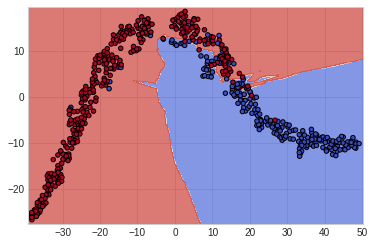

In [ ]:
X_comp = TSNE(n_components=2).fit_transform(X)
X0, X1 = X_comp[:,0], X_comp[:,1]
xx0, xx1 = make_meshgrid(X0, X1)

gs.fit(X_comp, y)
plot_contours(gs, xx0, xx1, cmap = plt.cm.coolwarm, alpha = 0.7)
plt.scatter(X0, X1, c = y , cmap = plt.cm.coolwarm, s = 20, edgecolors = 'k')

### 와인 데이터

In [ ]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

X,y = load_wine(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, 
                                                    random_state = 2023)

In [ ]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
print('학습데이터점수: {}'.format(model.score(X_train, y_train)))
print('평가데이터점수: {}'.format(model.score(X_test, y_test)))

학습데이터점수: 0.8309859154929577
평가데이터점수: 0.6388888888888888


In [ ]:
from joblib.parallel import cpu_count
from sklearn.model_selection import cross_val_score
import sklearn.model_selection as ms

cv_score = cross_val_score(estimator = KNeighborsClassifier(),
                        X = X, y = y,
                        cv = ms.StratifiedKFold(shuffle = True, random_state = 2023),
                        n_jobs = multiprocessing.cpu_count())

print('cv score : {}'.format(cv_score.mean()))

cv score : 0.6912698412698413


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import sklearn.model_selection as ms

model = make_pipeline(StandardScaler(), KNeighborsClassifier())
param_dict = {'kneighborsclassifier__n_neighbors' : [3,5,7],
              'kneighborsclassifier__weights' : ['uniform', 'distance'],
              'kneighborsclassifier__algorithm' : ['ball_tree', 'kd_tree', 'brute','auto'],
              'kneighborsclassifier__p' : [1,2,3]}

gs = GridSearchCV(model, param_grid = param_dict, 
                  cv = ms.StratifiedKFold(shuffle = True, random_state = 2023),
                  n_jobs = multiprocessing.cpu_count(),
                  verbose = True)

gs.fit(X_train, y_train)

In [ ]:
print('최적 파라미터 : {}'.format(gs.best_estimator_))
print('최종 점수 : {}'.format(gs.score(X_test, y_test)))

res = pd.DataFrame(gs.cv_results_).sort_values('rank_test_score')
res[['rank_test_score', 'mean_test_score',
     'param_kneighborsclassifier__algorithm',
     'param_kneighborsclassifier__n_neighbors',
     'param_kneighborsclassifier__weights',
     'param_kneighborsclassifier__p']].head(8)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
최적 파라미터 : Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier',
                 KNeighborsClassifier(algorithm='ball_tree', p=1))])
최종 점수 : 1.0


,rank_test_score,mean_test_score,param_kneighborsclassifier__algorithm,param_kneighborsclassifier__n_neighbors,param_kneighborsclassifier__weights,param_kneighborsclassifier__p
24,1,0.979064,kd_tree,5,uniform,1
43,1,0.979064,brute,5,distance,1
42,1,0.979064,brute,5,uniform,1
31,1,0.979064,kd_tree,7,distance,1
30,1,0.979064,kd_tree,7,uniform,1
25,1,0.979064,kd_tree,5,distance,1
48,1,0.979064,brute,7,uniform,1
60,1,0.979064,auto,5,uniform,1


Fitting 5 folds for each of 72 candidates, totalling 360 fits


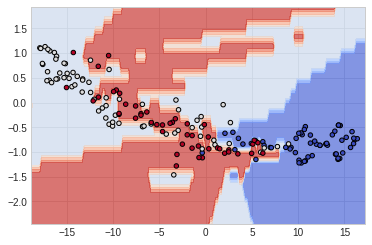

In [ ]:
X_comp = TSNE(n_components=2).fit_transform(X)
X0, X1 = X_comp[:,0], X_comp[:,1]
xx0, xx1 = make_meshgrid(X0, X1)

gs.fit(X_comp, y)
plot_contours(gs, xx0, xx1, cmap = plt.cm.coolwarm, alpha = 0.7)
plt.scatter(X0, X1, c = y , cmap = plt.cm.coolwarm, s = 20, edgecolors = 'k')
plt.show()

## k 최근접 이웃 회귀

* k 최근접 이웃 분류와 마찬가지로 예측에 이웃 데이터 포인트 사용
* 이웃 데이터 포인트의 평균이 예측 결과

### 보스턴 주택 가격 데이터

입력변수중에 카테고리타입이 있지만 일단 진행

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

X, y = datasets.fetch_openml('boston', return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2023)

/usr/local/lib/python3.9/dist-packages/sklearn/datasets/_openml.py:301: UserWarning: Multiple active versions of the dataset matching the name boston exist. Versions may be fundamentally different, returning version 1.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     506 non-null    float64 
 1   ZN       506 non-null    float64 
 2   INDUS    506 non-null    float64 
 3   CHAS     506 non-null    category
 4   NOX      506 non-null    float64 
 5   RM       506 non-null    float64 
 6   AGE      506 non-null    float64 
 7   DIS      506 non-null    float64 
 8   RAD      506 non-null    category
 9   TAX      506 non-null    float64 
 10  PTRATIO  506 non-null    float64 
 11  B        506 non-null    float64 
 12  LSTAT    506 non-null    float64 
dtypes: category(2), float64(11)
memory usage: 45.1 KB


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from joblib.parallel import cpu_count
from sklearn.model_selection import cross_val_score
import sklearn.model_selection as ms

cv_score = cross_val_score(estimator = KNeighborsRegressor(),
                        X = X, y = y,
                        cv = ms.KFold(shuffle = True, random_state = 2023),
                        n_jobs = multiprocessing.cpu_count())

print('cv score : {}'.format(cv_score.mean()))

cv score : 0.5255358491584481


In [ ]:
from sklearn.pipeline import make_pipeline

make_pipeline(KNeighborsRegressor()).get_params().items()

dict_items([('memory', None), ('steps', [('kneighborsregressor', KNeighborsRegressor())]), ('verbose', False), ('kneighborsregressor', KNeighborsRegressor()), ('kneighborsregressor__algorithm', 'auto'), ('kneighborsregressor__leaf_size', 30), ('kneighborsregressor__metric', 'minkowski'), ('kneighborsregressor__metric_params', None), ('kneighborsregressor__n_jobs', None), ('kneighborsregressor__n_neighbors', 5), ('kneighborsregressor__p', 2), ('kneighborsregressor__weights', 'uniform')])

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import sklearn.model_selection as ms

model = make_pipeline(StandardScaler(), KNeighborsRegressor())
param_dict = {'kneighborsregressor__n_neighbors' : [3,5,7],
              'kneighborsregressor__weights' : ['uniform', 'distance'],
              'kneighborsregressor__algorithm' : ['ball_tree', 'kd_tree', 'brute','auto'],
              'kneighborsregressor__p' : [1,2,3]}

gs = GridSearchCV(model, param_grid = param_dict, 
                  cv = ms.KFold(shuffle = True, random_state = 2023),
                  n_jobs = multiprocessing.cpu_count(),
                  verbose = True)

gs.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=2023, shuffle=True),
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('kneighborsregressor',
                                        KNeighborsRegressor())]),
             n_jobs=2,
             param_grid={'kneighborsregressor__algorithm': ['ball_tree',
                                                            'kd_tree', 'brute',
                                                            'auto'],
                         'kneighborsregressor__n_neighbors': [3, 5, 7],
                         'kneighborsregressor__p': [1, 2, 3],
                         'kneighborsregressor__weights': ['uniform',
                                                          'distance']},
             verbose=True)

In [ ]:
print('최적 파라미터 : {}'.format(gs.best_estimator_))
print('최종 점수 : {}'.format(gs.score(X_test, y_test)))

res = pd.DataFrame(gs.cv_results_).sort_values('rank_test_score')
res[['rank_test_score', 'mean_test_score',
     'param_kneighborsregressor__algorithm',
     'param_kneighborsregressor__n_neighbors',
     'param_kneighborsregressor__weights',
     'param_kneighborsregressor__p']].head(8)

최적 파라미터 : Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsregressor',
                 KNeighborsRegressor(algorithm='ball_tree', n_neighbors=3, p=1,
                                     weights='distance'))])
최종 점수 : 0.8937698141188772


,rank_test_score,mean_test_score,param_kneighborsregressor__algorithm,param_kneighborsregressor__n_neighbors,param_kneighborsregressor__weights,param_kneighborsregressor__p
55,1,0.766378,auto,3,distance,1
19,1,0.766378,kd_tree,3,distance,1
37,1,0.766378,brute,3,distance,1
1,1,0.766378,ball_tree,3,distance,1
3,5,0.764631,ball_tree,3,distance,2
21,5,0.764631,kd_tree,3,distance,2
39,5,0.764631,brute,3,distance,2
57,5,0.764631,auto,3,distance,2


Fitting 5 folds for each of 72 candidates, totalling 360 fits


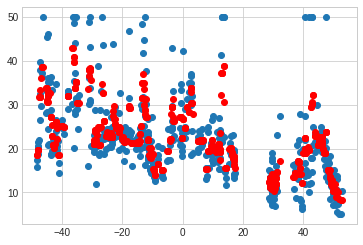

In [ ]:
X_comp = TSNE(n_components = 1).fit_transform(X)
plt.scatter(X_comp, y)
gs.fit(X_comp, y)
predict = gs.predict(X_comp)
plt.scatter(X_comp, predict, color = 'r')

### 당뇨병 데이터

In [ ]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

diabetes = load_diabetes()
X, y = load_diabetes(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                    random_state = 2023)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from joblib.parallel import cpu_count
from sklearn.model_selection import cross_val_score
import sklearn.model_selection as ms

cv_score = cross_val_score(estimator = KNeighborsRegressor(),
                        X = X, y = y,
                        cv = ms.KFold(shuffle = True, random_state = 2023),
                        n_jobs = multiprocessing.cpu_count())

print('cv score : {}'.format(cv_score.mean()))

cv score : 0.3557195971654948


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import sklearn.model_selection as ms

model = make_pipeline(StandardScaler(), KNeighborsRegressor())
param_dict = {'kneighborsregressor__n_neighbors' : [3,5,7],
              'kneighborsregressor__weights' : ['uniform', 'distance'],
              'kneighborsregressor__algorithm' : ['ball_tree', 'kd_tree', 'brute','auto'],
              'kneighborsregressor__p' : [1,2,3]}

gs = GridSearchCV(model, param_grid = param_dict, 
                  cv = ms.KFold(shuffle = True, random_state = 2023),
                  n_jobs = multiprocessing.cpu_count(),
                  verbose = True)

gs.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=2023, shuffle=True),
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('kneighborsregressor',
                                        KNeighborsRegressor())]),
             n_jobs=2,
             param_grid={'kneighborsregressor__algorithm': ['ball_tree',
                                                            'kd_tree', 'brute',
                                                            'auto'],
                         'kneighborsregressor__n_neighbors': [3, 5, 7],
                         'kneighborsregressor__p': [1, 2, 3],
                         'kneighborsregressor__weights': ['uniform',
                                                          'distance']},
             verbose=True)

In [ ]:
print('최적 파라미터 : {}'.format(gs.best_estimator_))
print('최종 점수 : {}'.format(gs.score(X_test, y_test)))

res = pd.DataFrame(gs.cv_results_).sort_values('rank_test_score')
res[['rank_test_score', 'mean_test_score',
     'param_kneighborsregressor__algorithm',
     'param_kneighborsregressor__n_neighbors',
     'param_kneighborsregressor__weights',
     'param_kneighborsregressor__p']].head(8)

최적 파라미터 : Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsregressor',
                 KNeighborsRegressor(algorithm='ball_tree', n_neighbors=7, p=1,
                                     weights='distance'))])
최종 점수 : 0.44932851564605747


,rank_test_score,mean_test_score,param_kneighborsregressor__algorithm,param_kneighborsregressor__n_neighbors,param_kneighborsregressor__weights,param_kneighborsregressor__p
49,1,0.330962,brute,7,distance,1
67,1,0.330962,auto,7,distance,1
31,1,0.330962,kd_tree,7,distance,1
13,1,0.330962,ball_tree,7,distance,1
69,5,0.329058,auto,7,distance,2
33,5,0.329058,kd_tree,7,distance,2
51,5,0.329058,brute,7,distance,2
15,5,0.329058,ball_tree,7,distance,2


Fitting 5 folds for each of 72 candidates, totalling 360 fits


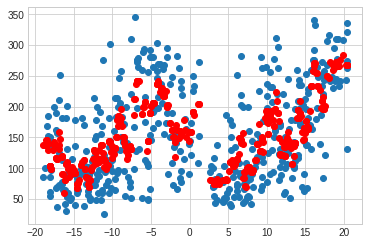

In [ ]:
X_comp = TSNE(n_components = 1).fit_transform(X)
plt.scatter(X_comp, y)
gs.fit(X_comp, y)
predict = gs.predict(X_comp)
plt.scatter(X_comp, predict, color = 'r')